<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
# Выполнила: Панина Даната БПМ-23-1



## Задание:
 Целью данной лабораторной работы является ознакомление с выбранным датасетом,его структурой и проведение первичного обзора.

 Набор данных об успеваемости учащихся (синтетический, реалистичный).
 (student_performance.csv)






In [ ]:
# установка зависимостей
!pip install pandas matplotlib seaborn

In [ ]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Описание:
В этом разделе вы загрузите набор данных wine.csv, ознакомитесь с его структурой и проведёте первичный обзор.

In [23]:
PATH_TO_FILE: str = '/content/student_performance.csv' # Загрузка набора данных
## p.s. в левой панеле нажать на папку и перетащить туда файл,
## а wince.csv заменить на свой вариант (ПКМ -> копировать путь)

df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame

In [24]:
# вывод датафрейма
df # p.s. обычно переменную с набором данных называют df, придерживайтесь этого наименования в дальнейшем

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A


In [25]:
# Вывод первых 5 строк
df.head()

# вывод 5 последних строк
#df.tail()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [26]:
# Информация о наборе данных
df.info() # инфо о датасете название колонки, сколько не пропущенных, дефолтный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [27]:
# Статистический разбор
df.describe() # include=all (вывод включая категориальные)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [35]:
# преобразование в категориальные
# df.columnName = df.columnName.astype('category')
# or
df['student_id'] = df['student_id'].astype('object')

In [29]:
# Вывод колонок в наборе данных
df.columns

Index(['student_id', 'weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'total_score', 'grade'],
      dtype='object')

## Определение типов переменных

In [36]:
# Список столбцов и их типов данных
print(df.dtypes)

student_id                  object
weekly_self_study_hours    float64
attendance_percentage      float64
class_participation        float64
total_score                float64
grade                       object
dtype: object


- Числовые переменные обычно имеют тип int64 или float64.
- Категориальные переменные могут иметь тип object или int (например метки класса)

## Статистический разбор данных

1. **Посчитайте количество уникальных значений для каждой переменной:**

In [37]:
# Количество уникальных значений
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

student_id: 1000000 уникальных значений
weekly_self_study_hours: 401 уникальных значений
attendance_percentage: 501 уникальных значений
class_participation: 101 уникальных значений
total_score: 824 уникальных значений
grade: 5 уникальных значений


## **Задача №1 Определение типов переменных**

**⏰ задача**

Определить типы переменных
- номинальные переменные (не имеют порядка и сравнения)
- порядковые пиеременные (имеют порядок, но не имеют смысла мат операции)
- числовые непрерывные переменные (имеют порядок, есть смысл мат операций)

Вывести статистику для числовых и для категоиральных перменных раздельно.

p.s. если существует несколько гипотез к какому типу относительно одна и та же переменной - объяснить почему

Номинальные

*   student_id (Это просто метка, не имеет порядка, не участвует в расчетах. Используется для идентификации, а не для анализа.)

Порядковые

*   grade (оценка)
*   class_participation (рейтинговая шкала)

Числовые


*   weekly_self_study_hours (Количественная величина, можно усреднять, складывать, делить. Значения могут быть дробными (например, 12.5 ч).)
*   attendance_percentage (процент посещаймости, переменная количественная, можно считать среднее)
*   total_score (итоговый балл за задание - количественная переменная с четким смыслом)
*   class_participation(с баллами можно проводить мат операции)

Гипотеза: class_participation- это рейтинговая шкала. С одной стороны, баллы от 0 до 10 можно усреднять → трактовать как числовую. С другой стороны, разница между 2 и 4 может не иметь того же смысла, что между 7 и 9 → порядковая.
Выбор зависит от контекста анализа: если используем для регрессии или корреляции → считаем числовой, если для описания уровня активности → порядковая.







In [45]:
#Статистика числовых переменных
df['class_participation'] = df['class_participation'].astype('float64')
df.describe()


,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,15.029127,84.711046,5.985203,84.283845
std,6.899431,9.424143,1.956421,15.432969
min,0.000000,50.000000,0.000000,9.400000
25%,10.300000,78.300000,4.700000,73.900000
50%,15.000000,85.000000,6.000000,87.500000
75%,19.700000,91.800000,7.300000,100.000000
max,40.000000,100.000000,10.000000,100.000000


In [40]:
#Статистика категориальных переменных
df['class_participation'] = df['class_participation'].astype('object')
df.describe(include = 'object')

,student_id,class_participation,grade
count,1000000,1000000.0,1000000
unique,1000000,101.0,5
top,999984,10.0,A
freq,1,24128.0,548644


## **4. Визуализация распределения переменных**

### **Описание:**
Создайте визуализации для понимания распределения числовых и категориальных переменных.

### **Шаги:**


1. **Гистограмма для числовых переменных:**

**задача ⏰**

Описать вывод графиков.
- Является ли распределение нормальным или отлично от него?
- Концентрация большинства значений
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

p.s. 3-5 самых показательных примеров.

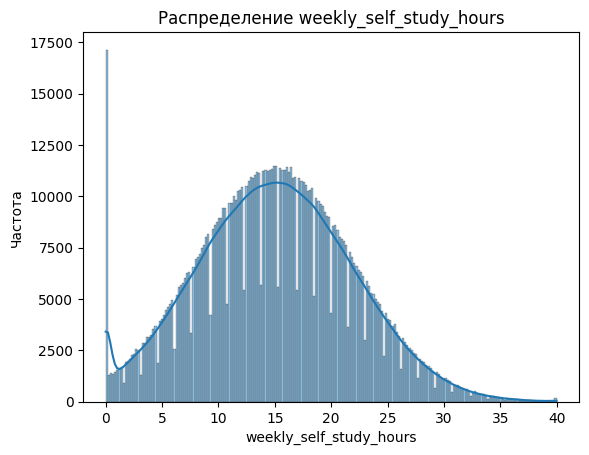

In [61]:
sns.histplot(df['weekly_self_study_hours'], kde=True)
plt.title('Распределение weekly_self_study_hours')
plt.xlabel('weekly_self_study_hours')
plt.ylabel('Частота')
plt.show()

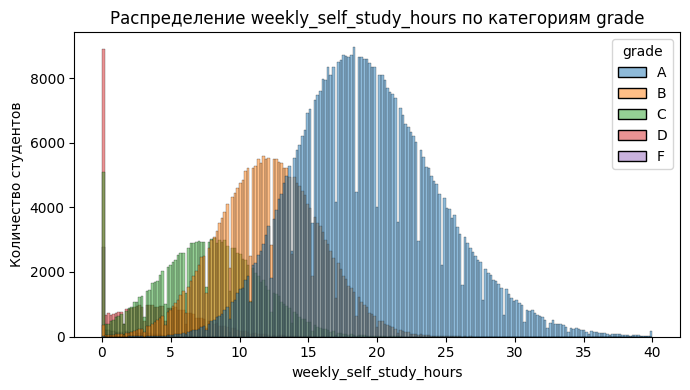

In [69]:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x='weekly_self_study_hours', hue='grade')
    plt.title(f'Распределение weekly_self_study_hours по категориям grade')
    plt.xlabel('weekly_self_study_hours')
    plt.ylabel('Количество студентов')
    plt.tight_layout()
    plt.show()

Распределение количества часов самостоятельной работы немного смещено влево и не является строго нормальным.
Большинство студентов учатся от 10 до 20 часов в неделю, пик распределения — около 15.
Если наложить hue='grade', видно, что:

Студенты с оценками A и B чаще учатся >15 часов.

Студенты с оценками D и F сосредоточены в области <10 часов.

Вывод: количество часов самостоятельной работы положительно коррелирует с итоговой оценкой, но влияние слабее, чем у total_score.

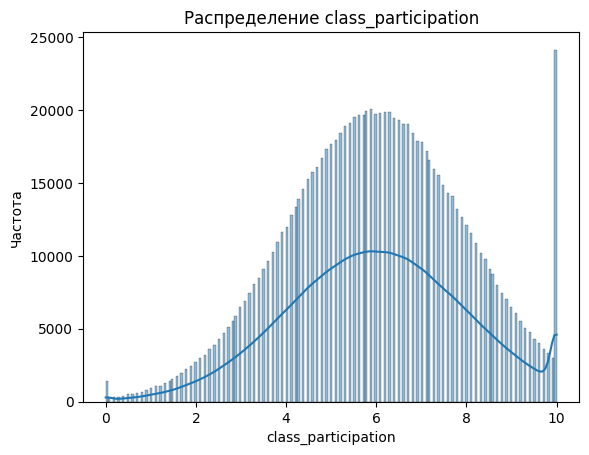

In [59]:
sns.histplot(df['class_participation'], kde=True)
plt.title('Распределение class_participation')
plt.xlabel('class_participation')
plt.ylabel('Частота')
plt.show()

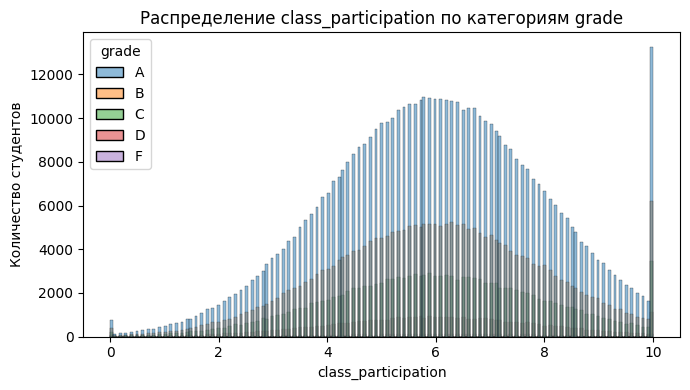

In [70]:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x='class_participation', hue='grade')
    plt.title(f'Распределение class_participation по категориям grade')
    plt.xlabel('class_participation')
    plt.ylabel('Количество студентов')
    plt.tight_layout()
    plt.show()

Распределение переменной class_participation близко к нормальному.
Наибольшая концентрация наблюдается в диапазоне 5–7 баллов, что говорит о среднем уровне вовлечённости студентов.
При наложении категории grade через параметр hue можно заметить, что студенты с более высокими оценками (A, B) смещены вправо (высокое участие), а студенты с низкими оценками (D, F) чаще встречаются в левой части графика (низкое участие).
Это позволяет сделать вывод, что уровень участия в занятиях является хорошим предиктором итоговой оценки.


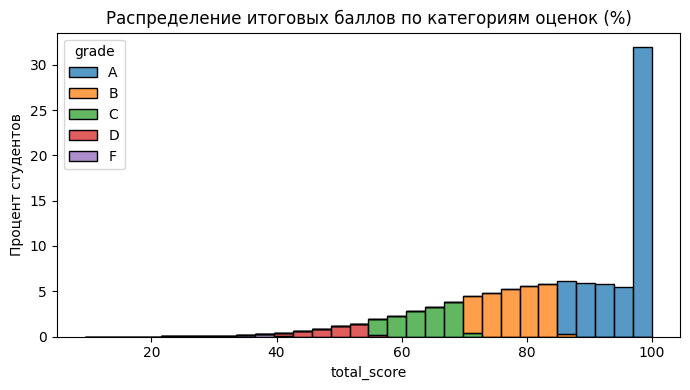

In [51]:
plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x='total_score',
    hue='grade',
    multiple='stack',
    stat="percent",
    bins=30 # вручную задаём количество корзин
)
plt.title('Распределение итоговых баллов по категориям оценок (%)')
plt.xlabel('total_score')
plt.ylabel('Процент студентов')
plt.tight_layout()
plt.show()

Распределение переменной total_score отличается от нормального — оно смещено вправо, с сильным пиком около 100 баллов.
Большинство студентов имеют результат выше 70, а самая большая концентрация — в интервале 90–100.
Если наложить категориальную переменную grade через параметр hue, видно, что:

Категории A и B почти полностью расположены в правой части распределения (80–100).

Категории C, D, F встречаются преимущественно в левой части (0–70).

Вывод: total_score является сильным предиктором grade, так как распределение категорий почти не пересекается.

**задача ⏰**

Описать вывод графиков.
- в каких значениях концентрируентся переменная?
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

2. **Столбчатая диаграмма для категориальной переменной `Class`:**

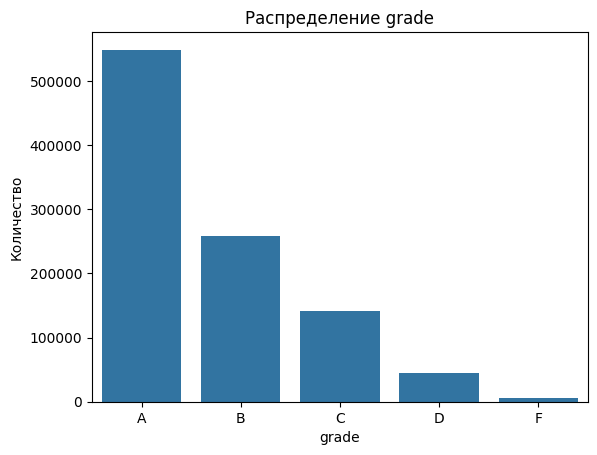

In [57]:
sns.countplot(x='grade', data=df)
plt.title('Распределение grade')
plt.xlabel('grade')
plt.ylabel('Количество')
plt.show()

Исходя из графика, переменная концентрируется в зачении 'A'

**задача ⏰**

Описать вывод графиков.
- Есть ли выбросы?
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина). Определить различия по медиане

**Боксплот для числовой переменной:**

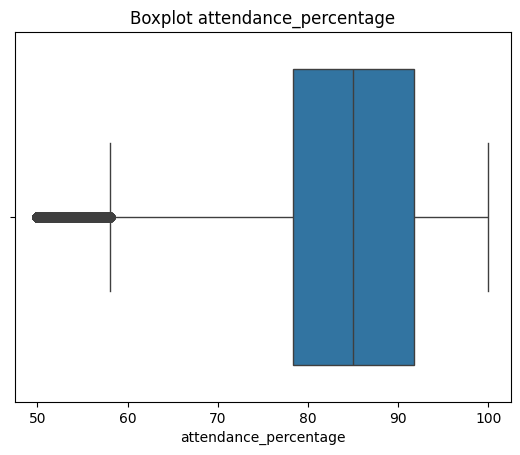

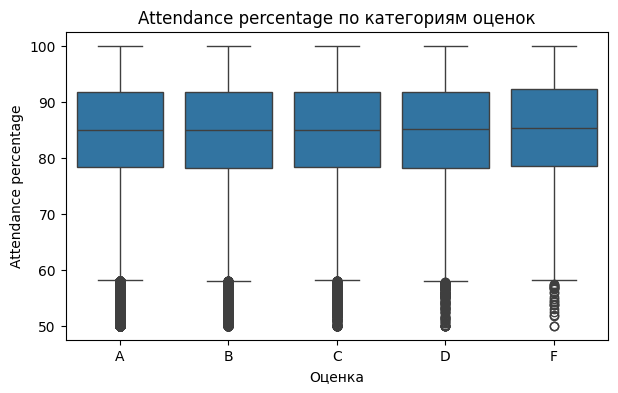

In [72]:
sns.boxplot(x=df['attendance_percentage'])
plt.title('Boxplot attendance_percentage')
plt.xlabel('attendance_percentage')
plt.show()
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='grade', y='attendance_percentage')
plt.title('Attendance percentage по категориям оценок')
plt.xlabel('Оценка')
plt.ylabel('Attendance percentage')
plt.show()

На графике присутствуют выбросы — их видно слева от нижнего уса boxplot (значения < ~60%). Основная масса студентов посещает занятия на уровне от 78 до 95 % — именно здесь расположена коробка boxplot. Медиана (чёрная линия внутри коробки) находится на 85 %.
Значение категориальной переменной продсказать нельзя так как медианна и коробка нахоходятся на одном уровне у всех оценок.

**Постройте корреляционную матрицу для всех числовых переменных и визуализируйте её с помощью тепловой карты:**

**задача ⏰**

Интерпертировать полученный результат:
- Какие переменные не коррелируют?
- Какие переменные имеют сильную положительную корреляцию?
- Какие переменные имеют сильную слабую корреляцию?

p.s. сильная корреляция считаем abs(corr_coef) >= 0.7

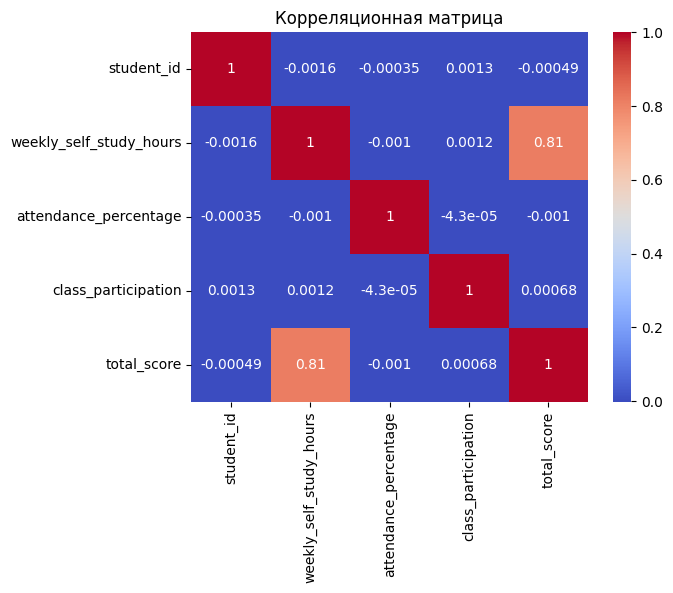

In [80]:
# Корреляционная матрица
correlation_matrix = df.corr()

# Визуализация тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Интерпретация полученных результатов из корреляционной матрицы:
weekly_self_study_hours:
*   Есть очень слабая (практически нет) корреляция отрицательная с attendance_percentage
*   Есть очень слабая (практически нет) корреляция положительная с class_participation
*   Очень сильная положительная корреляция с total_score

attendance_percentage:
*   Есть очень слабая (практически нет) корреляция отрицательная с class_participation
*  Есть очень слабая (практически нет) корреляция отрицательная с total_score

class_participation:
*   Есть очень слабая (практически нет) корреляция положительная с total_score











**если ValueError**

In [78]:
# Если будут ошибки ValueError из-за could not conver string to float
df = df.drop('colName', axis=1)
# найти колонку, из-за которой ничего не получается,
# можно найти по object из df.info()

KeyError: "['colName'] not found in axis"